In [139]:
# Binance API information
API_KEY = ""
SECRET_KEY = ""


In [42]:
import requests
import json
import pandas as pd
import datetime as dt

In [150]:
url = 'https://api.binance.com/api/v3/klines'
symbol = 'SOLUSDT'
interval = '1h'
start = str(int(dt.datetime(2021,5,1).timestamp()*1000))
end = str(int(dt.datetime(2023,3,11).timestamp()*1000))
# end = str(int(dt.datetime(2021,8,1).timestamp()*1000))
par = {'symbol': symbol, 'interval': interval, 'startTime': start, 'endTime': end}
data = pd.DataFrame(json.loads(requests.get(url, params= par).text))
#format columns name
data.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume','close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore']
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.datetime]
data=data.astype(float)
data.tail()

,datetime,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
2021-05-21 15:00:00,1.621580e+12,43.988,44.853,43.334,43.961,395523.220,1.621584e+12,1.739925e+07,23381.0,191280.043,8.420100e+06,0.0
2021-05-21 16:00:00,1.621584e+12,43.971,43.991,41.548,42.208,626298.313,1.621588e+12,2.666633e+07,35565.0,292485.479,1.245753e+07,0.0
2021-05-21 17:00:00,1.621588e+12,42.233,44.319,42.192,43.587,422407.631,1.621591e+12,1.830126e+07,25651.0,234529.962,1.016602e+07,0.0
2021-05-21 18:00:00,1.621591e+12,43.601,43.761,42.503,42.718,272294.858,1.621595e+12,1.177763e+07,16775.0,150364.440,6.508678e+06,0.0
2021-05-21 19:00:00,1.621595e+12,42.721,43.037,41.000,42.214,536122.868,1.621598e+12,2.246005e+07,29947.0,287728.167,1.205976e+07,0.0


In [190]:
import requests
import time

def fetch_binance_historical_data(symbol, interval, start_time, end_time):
    """
    Fetches historical k-line data from Binance API for a given symbol, interval, start time, and end time.
    
    :param symbol: str, trading pair symbol (e.g., 'BTCUSDT' for Bitcoin/USDT)
    :param interval: str, timeframe for the historical data (e.g., '1d' for daily)
    :param start_time: int, start timestamp in milliseconds
    :param end_time: int, end timestamp in milliseconds
    :return: list of dictionaries, historical k-line data
    """
    # Define API endpoint
    endpoint = 'https://api.binance.com/api/v3/klines'
    
    # Initialize empty list to store historical data
    historical_data = []
    
    # Loop until end time is reached
    while start_time < end_time:
        # Calculate remaining time until end time or maximum allowed timeframe (500 data points)

        if interval[-1] == 'h':
            interval_size = (int(interval[0]) * 60) - 1
        else:
            interval_size = int(interval[:-1])
        
        remaining_time = min(end_time - start_time, 500 * interval_size * 60 * 1000)
        
        # Define API parameters for current request
        params = {
            'symbol': symbol,
            'interval': interval,
            'startTime': start_time,
            'endTime': start_time + remaining_time,
            'limit': 500,
        }
        
        # Send API request and parse response
        response = requests.get(endpoint, params=params)
        data = response.json()

        # display(len(data)) 
        
        # Append fetched data to historical_data list
        historical_data.extend(data)
        
        # Update start time for next request
        start_time += remaining_time + (int(interval[:-1]) * 60 * 1000)
        
        # Add delay to avoid hitting API rate limits (optional)
        time.sleep(1)
    
    return historical_data


In [218]:
# hist_data = fetch_binance_historical_data(symbol = 'AXSUSDT',
#                                           interval = '1h',
#                                           start_time = int(dt.datetime(2023,3,1).timestamp()*1000),
#                                           end_time = int(dt.datetime(2023,4,13).timestamp()*1000))

hist_data = fetch_binance_historical_data(symbol = 'AXSUSDT',
                                          interval = '1h',
                                          start_time = int(dt.datetime(2023,3,1).timestamp()*1000),
                                          end_time = int(dt.datetime(2023,5,6).timestamp()*1000))

In [219]:
len(hist_data)

1584

In [220]:
data = pd.DataFrame(hist_data)
#format columns name
data.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume','close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore']
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.datetime]
data=data.astype(float)
data.tail()

,datetime,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
2023-05-05 20:00:00,1.683288e+12,7.62,7.64,7.47,7.55,44559.89,1.683292e+12,336678.8271,1578.0,14863.18,112301.7937,0.0
2023-05-05 21:00:00,1.683292e+12,7.55,7.62,7.53,7.61,16389.72,1.683295e+12,124179.4459,484.0,9290.71,70441.7859,0.0
2023-05-05 22:00:00,1.683295e+12,7.62,7.69,7.61,7.68,36715.20,1.683299e+12,280721.0257,975.0,20826.63,159304.9533,0.0
2023-05-05 23:00:00,1.683299e+12,7.68,7.73,7.67,7.71,30138.36,1.683302e+12,232078.7388,757.0,20587.24,158573.0048,0.0
2023-05-06 00:00:00,1.683302e+12,7.72,7.81,7.71,7.77,70995.83,1.683306e+12,551780.6399,1755.0,44215.81,343750.4254,0.0


In [77]:
# code to extract suport and resistance levels from OHLCV data

from ta.trend import ADXIndicator

def ADX(df, window):
    indicator_adx = ADXIndicator(high=df['high'], low=df['low'], close=df['close'], window=window)
    return indicator_adx.adx()

def ADX_NEG(df, window):
    indicator_adx = ADXIndicator(high=df['high'], low=df['low'], close=df['close'], window=window)
    return indicator_adx.adx_neg()

def ADX_POS(df, window):
    indicator_adx = ADXIndicator(high=df['high'], low=df['low'], close=df['close'], window=window)
    return indicator_adx.adx_pos()


In [95]:
from sklearn.cluster import AgglomerativeClustering

def calculate_support_resistance(df, rolling_wave_length, num_clusters):
    date = df.index
    # Reset index for merging
    # df.reset_index(inplace=True)

    # Create min and max waves
    max_waves_temp = df.high.rolling(rolling_wave_length).max().rename('waves')
    min_waves_temp = df.low.rolling(rolling_wave_length).min().rename('waves')
    max_waves = pd.concat([max_waves_temp, pd.Series(np.zeros(len(max_waves_temp)) + 1)], axis=1)
    min_waves = pd.concat([min_waves_temp, pd.Series(np.zeros(len(min_waves_temp)) + -1)], axis=1)
    #  Remove dups
    max_waves.drop_duplicates('waves', inplace=True)
    min_waves.drop_duplicates('waves', inplace=True)
    #  Merge max and min waves
    waves = max_waves.append(min_waves).sort_index()
    waves = waves[waves[0] != waves[0].shift()].dropna()
    # Find Support/Resistance with clustering using the rolling stats
    # Create [x,y] array where y is always 1
    x = np.concatenate((waves.waves.values.reshape(-1, 1),
                        (np.zeros(len(waves)) + 1).reshape(-1, 1)), axis=1)
    # Initialize Agglomerative Clustering
    cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
    cluster.fit_predict(x)
    waves['clusters'] = cluster.labels_
    # Get index of the max wave for each cluster
    waves2 = waves.loc[waves.groupby('clusters')['waves'].idxmax()]
    df.index = date
    waves2.waves.drop_duplicates(keep='first', inplace=True)
    return waves2.reset_index().waves

In [104]:
support_resistance_lb = data
rolling_wave_length = 20
num_clusters = 6
support_resistance_levels = calculate_support_resistance(support_resistance_lb, rolling_wave_length, num_clusters)
print(support_resistance_levels)


# #  LONG ENTRY
#     #----------------------------------------------
#     #  calculate support/resistance levels
#     rolling_wave_length = 20
#     num_clusters = 4
#     if self.i < 200 + rolling_wave_length:
#         return
#     #  Grab a subset of the data
#     support_resistance_lb = self.data.df.iloc[-200 - rolling_wave_length:]
#     #  Calculate support/resistance
#     support_resistance_levels = calculate_support_resistance(support_resistance_lb, rolling_wave_length, num_clusters)
#     #  Check resistance crossover
#     current_price = self.data.Close[-1]
#     for level in support_resistance_levels.to_list():
#         if self.data.Close[-1] >= level and self.data.Close[-2] <= level:
#             long_entry_signal += 1
#             break
#     #  ADX trend strength
#     if self.adx[-1] >= self.adx_strength_threshold:
#         long_entry_signal += 1
    
#     #  Check trend direction
#     adx_pos = self.adx_pos_neg[0]
#     adx_neg = self.adx_pos_neg[1]
#     if adx_pos[-1] > adx_neg[-1]:
#         long_entry_signal += 1
    
#     #  LONG EXIT
#     #----------------------------------------------
#     #  Stop loss
#     if self.long_hold == 1 and current_price <= (self.last_purchase_price * (1 - (self.stop_loss_pc/100))):
#         long_exit_signal += 1
#     #  Track max price after long entry
#     if self.long_hold == 1 and current_price > self.long_peak_price:
#         self.long_peak_price = current_price
#     #  Trailing stop loss
#     trailing_stop_price = self.long_peak_price * (1 - (self.trailing_stop_pc/100))
#     if self.long_hold == 1 and current_price <= trailing_stop_price:
#         long_exit_signal += 1

0    24.39
1    21.85
2    20.70
3    19.33
4    17.00
5    20.00
Name: waves, dtype: float64


<ipython-input-95-c87414d1d65a>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  waves = max_waves.append(min_waves).sort_index()


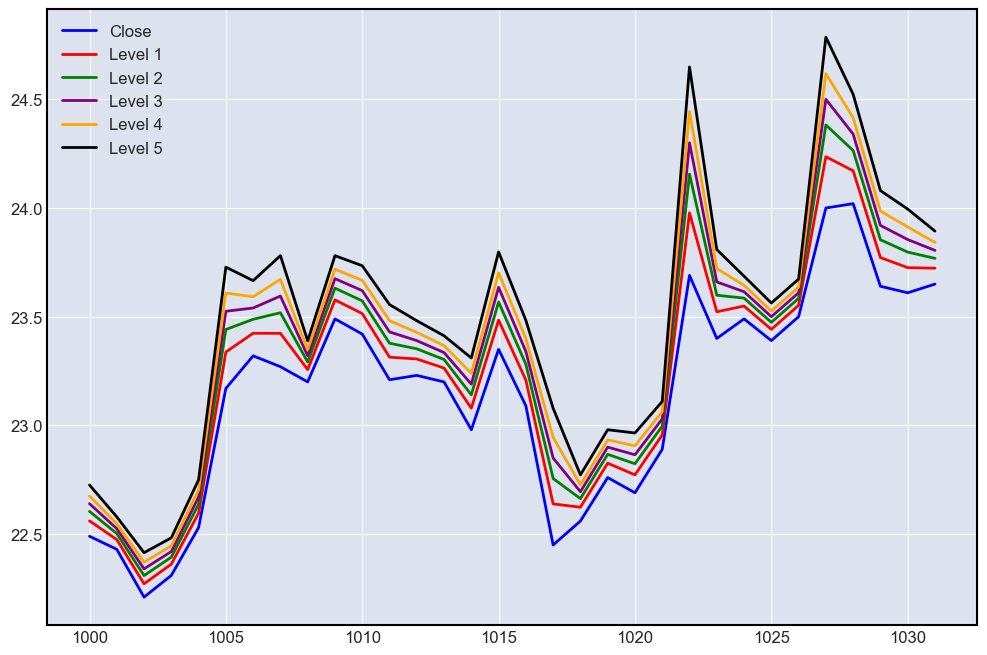

In [102]:
# Calculate the high, low, and close prices
new_data = data[1000:]
high = new_data["high"]
low = new_data["low"]
close = new_data["close"]

# Calculate the 1st and 2nd retracement levels
diff = high - low
level1 = close + (diff * 0.236)
level2 = close + (diff * 0.382)

# Calculate the 3rd, 4th, and 5th retracement levels
level3 = close + (diff * 0.5)
level4 = close + (diff * 0.618)
level5 = close + (diff * 0.786)

# Plot the OHLCV data with the retracement levels
plt.figure(figsize=(12,8))
plt.plot(close, color='blue', label='Close')
plt.plot(level1, color='red', label='Level 1')
plt.plot(level2, color='green', label='Level 2')
plt.plot(level3, color='purple', label='Level 3')
plt.plot(level4, color='orange', label='Level 4')
plt.plot(level5, color='black', label='Level 5')

# plt.xticks = str(new_data.index)
plt.legend(loc='upper left')
plt.show()


In [103]:
import pandas as pd
import numpy as np

'''
Fibonacci Retracements
Fibonacci retracements are used to identify potential levels of support and 
resistance by measuring the size of a price move and then dividing it by the 
key Fibonacci ratios of 23.6%, 38.2%, 50%, 61.8%, and 100%.
'''

# load data
data = data

# define fibonacci levels
levels = [0.0, 0.236, 0.382, 0.5, 0.618, 0.786, 1.0]

# calculate highest high and lowest low
high = data['high'].max()
low = data['low'].min()

# calculate price range
range_ = high - low

# calculate fibonacci levels
fib_levels = [(level * range_) + low for level in levels]

# identify support and resistance levels
supports = []
resistances = []

for level in fib_levels:
    level_data = data[(data['high'] >= level) & (data['low'] <= level)]
    if len(level_data) > 0:
        resistance = level_data['high'].max()
        support = level_data['low'].min()
        resistances.append(resistance)
        supports.append(support)

# print support and resistance levels
print('Support Levels:', supports)
print('Resistance Levels:', resistances)


Support Levels: [16.0, 17.69, 18.7, 18.92, 20.03, 21.53, 23.84]
Resistance Levels: [16.56, 18.7, 20.46, 21.78, 22.46, 23.24, 24.48]
